In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import pylab

from tqdm.auto import tqdm, trange

## Данные (симуляции)

In [18]:
data = np.load('mean_portfolio_sim.npy')

In [3]:
data.shape  # n_portfolio_type x n_sim x n_days

(3, 100, 10)

In [4]:
var_data = pd.DataFrame([pd.DataFrame(data[i].T).pct_change().dropna().iloc[0] for i in range(3)]).T  # one day
var_data.columns = ['currencies', 'stocks', 'bonds']
var_data.head(2)  # returns

,currencies,stocks,bonds
0,-0.002022,0.005985,-0.003399
1,0.002412,-0.006234,-0.000389


In [5]:
var_data['portfolio'] = var_data['bonds'] * 50/260 + var_data['stocks'] * 10/260 + \
var_data['currencies'] * 200/260

In [6]:
var_data.head(2)

,currencies,stocks,bonds,portfolio
0,-0.002022,0.005985,-0.003399,-0.001979
1,0.002412,-0.006234,-0.000389,0.001541


In [7]:
var_data.shape  # n_sim x n_portfolio_type

(100, 4)

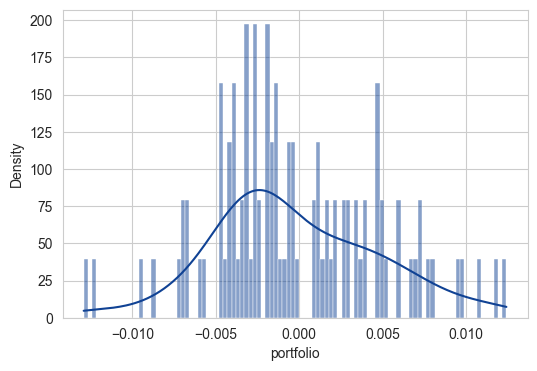

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(var_data, x='portfolio', bins=100, color='#104294', stat='density', kde=True);

## Var 1

Данные по одному дню, квантили по симуляциям.

### Параметрический подход

In [9]:
from var_es import Parametric_VE

In [10]:
ret = var_data['portfolio']
param_ve = Parametric_VE(ret)

In [11]:
param_ve.get_var_es()

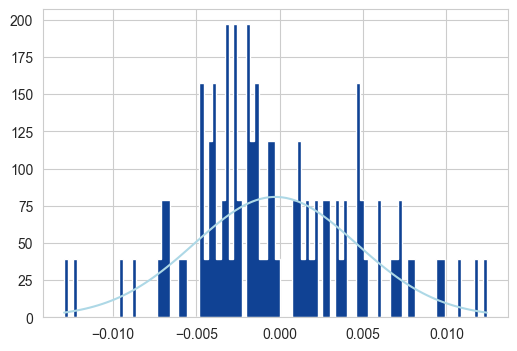

In [12]:
param_ve.plot_dist()

In [13]:
param_ve.print_res()

1-day VaR 99%: -0.012
1-day ES 97.5%: -0.013
10-day VaR 99%: -0.037
10-day ES 97.5%: -0.040


### Исторический подход

In [14]:
from var_es import Historical_VE
hist_ve = Historical_VE(ret)

1-day VaR 99%: -0.012
1-day ES 97.5%: -0.012
10-day VaR 99%: -0.039
10-day ES 97.5%: -0.036


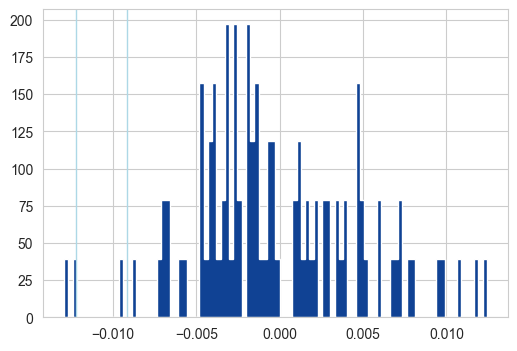

In [15]:
hist_ve.get_var_es()
hist_ve.print_res()
hist_ve.plot_dist()

### Bootstrapping

In [16]:
from var_es import Bootstrap_VE
boot_ve = Bootstrap_VE(ret)

In [17]:
boot_ve.get_var_es()
boot_ve.print_res()

1-day VaR 99%: -0.011
1-day ES 97.5%: -0.012
10-day VaR 99%: -0.035
10-day ES 97.5%: -0.036


## Var 2

Данные до дня, квантили по дням.

### VaR library

In [67]:
data = np.load('mean_2022_portfolio_sim.npy')

In [68]:
data = pd.DataFrame(data.mean(axis=1).T).pct_change()
data.index = pd.date_range(start = '2022-01-01', end = '2022-12-31', freq = 'd')
data.columns = ['currencies', 'stocks', 'bonds']
weights = np.array([200/260, 10/260, 50/260])
# data['portfolio'] = bt_data['bonds'] * 50/260 + bt_data['stocks'] * 10/260 + \
# bt_data['currencies'] * 200/260

In [74]:
data

,currencies,stocks,bonds
2022-01-01,NaN,NaN,NaN
2022-01-02,0.000588,-0.000190,-0.000493
2022-01-03,-0.000023,-0.000274,-0.000084
2022-01-04,0.000813,-0.000336,-0.000202
2022-01-05,-0.000651,0.000614,-0.000188
...,...,...,...
2022-12-27,-0.000457,-0.001007,-0.000117
2022-12-28,-0.000612,0.001806,0.000041
2022-12-29,-0.000941,-0.000714,0.000189
2022-12-30,-0.000070,0.001916,-0.000298


In [72]:
var_ = VaR(data.dropna(), weights)

In [75]:
var_.historic()

,VaR(95.0),VaR(97.5),VaR(99.0),CVaR(95.0),CVaR(97.5),CVaR(99.0),CDaR(95.0),CDaR(97.5),CDaR(99.0)
2022-12-31,-0.000897,-0.000978,-0.001272,-0.001063,-0.001187,-0.001344,-0.0417,-0.042126,-0.042491


### Параметрический подход

In [30]:
data = bt_data.dropna()[:335]  # 01jan-02dec 2022

In [40]:
ret = data.portfolio

In [33]:
from var_es import Parametric_VE

In [42]:
param_ve = Parametric_VE(data.portfolio)

In [43]:
param_ve.get_var_es()

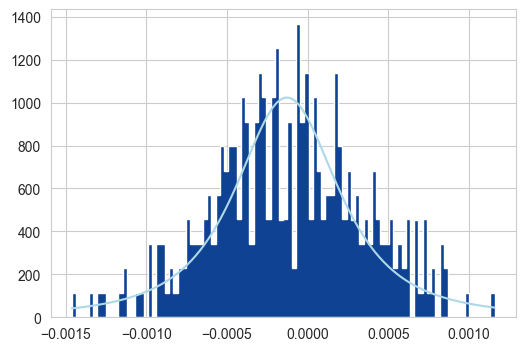

In [44]:
param_ve.plot_dist()

In [45]:
param_ve.print_res()

1-day VaR 99%: -0.001
1-day ES 97.5%: -0.001
10-day VaR 99%: -0.004
10-day ES 97.5%: -0.004


### Исторический подход

In [46]:
from var_es import Historical_VE
hist_ve = Historical_VE(data.portfolio)

1-day VaR 99%: -0.001
1-day ES 97.5%: -0.001
10-day VaR 99%: -0.004
10-day ES 97.5%: -0.004


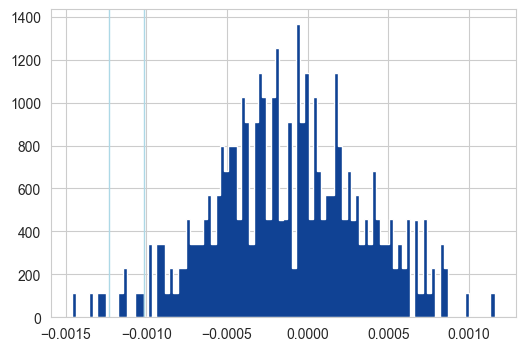

In [47]:
hist_ve.get_var_es()
hist_ve.print_res()
hist_ve.plot_dist()

### Bootstrapping

In [48]:
from var_es import Bootstrap_VE
boot_ve = Bootstrap_VE(data.portfolio)

In [49]:
boot_ve.get_var_es()
boot_ve.print_res()

1-day VaR 99%: -0.001
1-day ES 97.5%: -0.001
10-day VaR 99%: -0.004
10-day ES 97.5%: -0.004


# Backtesting

In [ ]:
# !pip install var
# !pip install arch

In [20]:
data = np.load('mean_2022_portfolio_sim.npy')

In [21]:
bt_data = pd.DataFrame(data.mean(axis=1).T).pct_change()
bt_data.index = pd.date_range(start = '2022-01-01', end = '2022-12-31', freq = 'd')
bt_data.columns = ['currencies', 'stocks', 'bonds']
bt_data['portfolio'] = bt_data['bonds'] * 50/260 + bt_data['stocks'] * 10/260 + \
bt_data['currencies'] * 200/260

In [22]:
bt_data.dropna().head(2)

,currencies,stocks,bonds,portfolio
2022-01-02,0.000588,-0.000190,-0.000493,0.000350
2022-01-03,-0.000023,-0.000274,-0.000084,-0.000044


In [50]:
from var import VaR, load_data

var = {}
bth = {}
for pf in bt_data.columns:
    var[pf] = VaR(pd.DataFrame(bt_data[pf]), weights=np.array([1]))
    var[pf].monte_carlo()
    try:
        bth[pf] = var[pf].backtest(method='h')
        var[pf].evaluate(bth[pf], )
    except:
        pass

Backtest: Historic Method: 100%|████████████████████████████████████████████████████| 115/115 [00:00<00:00, 844.47it/s]


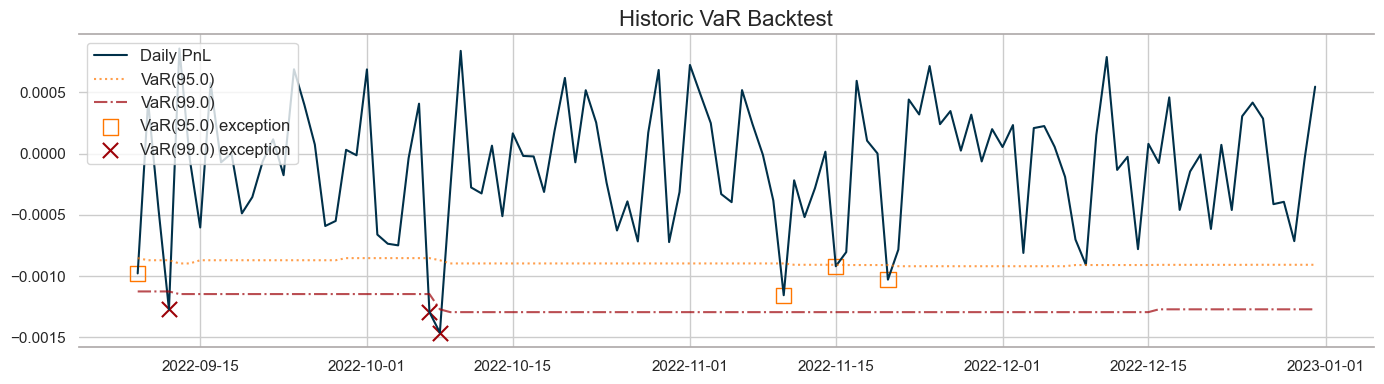

In [51]:
var['portfolio'].var_plot(bth['portfolio'])

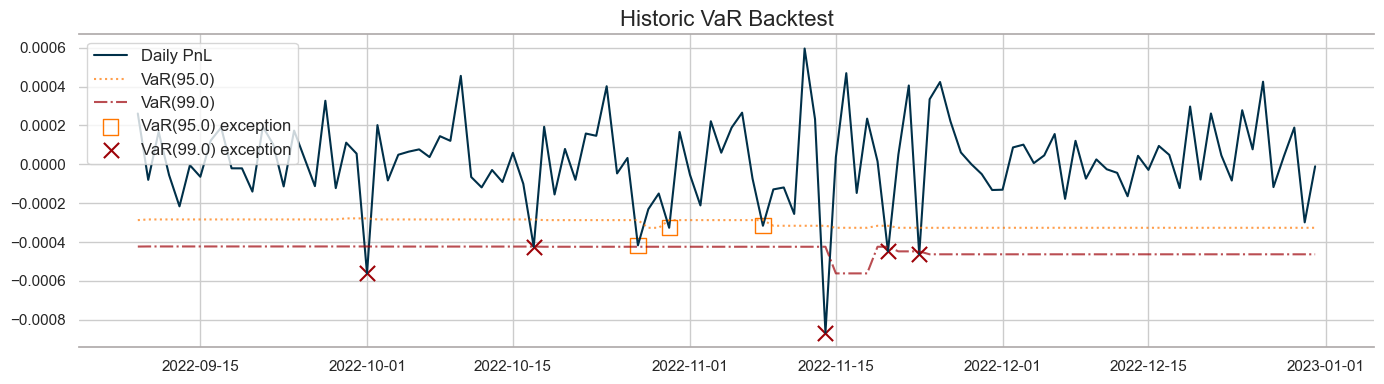

In [52]:
var['bonds'].var_plot(bth['bonds'])

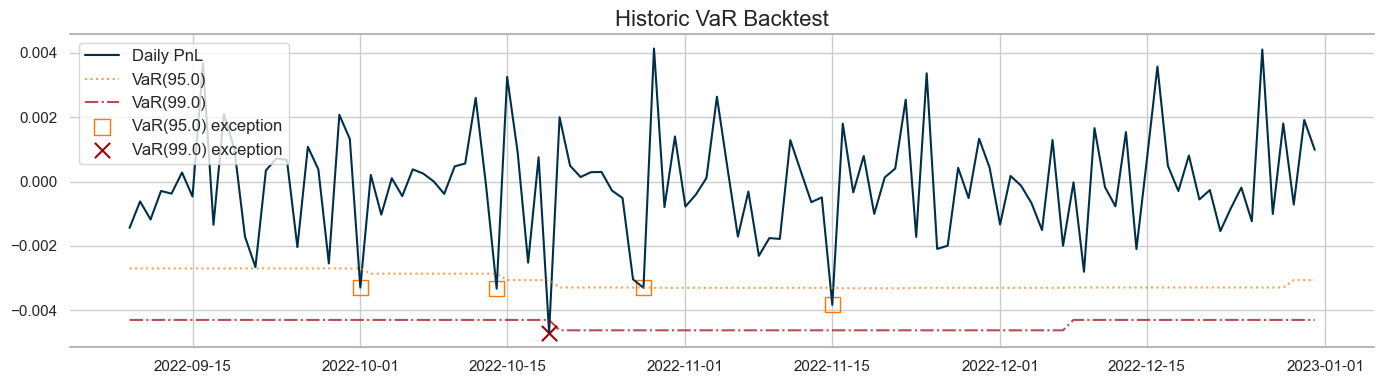

In [53]:
var['stocks'].var_plot(bth['stocks'])

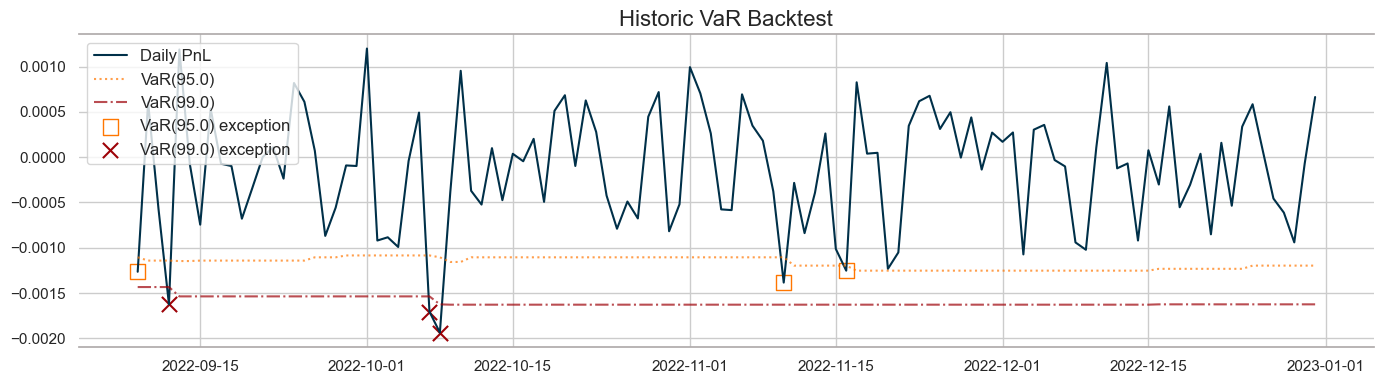

In [54]:
var['currencies'].var_plot(bth['currencies'])

In [68]:
from tabulate import tabulate

print(tabulate([['Parametric, 1d', var99param1d, cvar975param1d], ['Historical, 1d', var99hist1d, cvar975hist1d],
                ['Parametric, 10d', var99param10d, cvar975param10d], ['Historical, 10d', var99hist10d, cvar975hist10d],
                ['Bootstrapping, 1d', var99boot1d, cvar975boot1d], ['Bootstrapping, 10d', var99boot10d, cvar975boot10d]
                ],
               headers=['Approach', 'Value at Risk 99%', 'Conditional Value at Risk (ES) 97.5%'],
               tablefmt = 'fancy_grid',
               stralign = 'center',
               numalign= 'center',
               floatfmt=".4f"))

╒════════════════════╤═════════════════════╤════════════════════════════════════════╕
│      Approach      │  Value at Risk 99%  │  Conditional Value at Risk (ES) 97.5%  │
╞════════════════════╪═════════════════════╪════════════════════════════════════════╡
│   Parametric, 1d   │       -0.0119       │                -0.0126                 │
├────────────────────┼─────────────────────┼────────────────────────────────────────┤
│   Historical, 1d   │       -0.0122       │                -0.0115                 │
├────────────────────┼─────────────────────┼────────────────────────────────────────┤
│  Parametric, 10d   │       -0.0375       │                -0.0397                 │
├────────────────────┼─────────────────────┼────────────────────────────────────────┤
│  Historical, 10d   │       -0.0385       │                -0.0364                 │
├────────────────────┼─────────────────────┼────────────────────────────────────────┤
│ Bootstrapping, 1d  │       -0.0110       │          

# Real data

In [80]:
bt_data.describe()

,currencies,stocks,bonds,portfolio
count,364.000000,364.000000,364.000000,364.000000
mean,-0.000149,-0.000138,0.000021,-0.000116
std,0.000602,0.001640,0.000204,0.000463
min,-0.001937,-0.004697,-0.000866,-0.001462
25%,-0.000542,-0.001045,-0.000115,-0.000437
50%,-0.000149,-0.000081,0.000026,-0.000119
75%,0.000271,0.000798,0.000168,0.000202
max,0.001511,0.004847,0.000596,0.001160


In [79]:
real_data = pd.read_excel('Final_data.xlsx')
real_data.drop(columns='Date').pct_change().dropna().describe()

,Курс доллара,Курс евро,Нефть,МосБиржа,РТС,Золото,Серебро,...,Лукойл,МТС,ПИК,Роснефть,Сбербанк,Татнефть,Яндекс
count,2068.000000,2068.000000,2068.000000,2068.000000,2068.000000,2068.000000,2068.000000,...,2068.000000,2068.000000,2068.000000,2068.000000,2068.000000,2068.000000,2068.000000
mean,0.000157,0.000152,0.000518,0.000145,0.000129,0.000356,0.000417,...,0.000578,0.000395,0.000560,0.000400,0.000331,0.000501,0.000299
std,0.010566,0.010760,0.022708,0.014115,0.018726,0.012483,0.017337,...,0.018103,0.014924,0.015232,0.017683,0.019562,0.018749,0.020976
min,-0.079266,-0.080649,-0.265055,-0.332806,-0.383021,-0.086887,-0.180415,...,-0.329983,-0.226968,-0.268180,-0.378864,-0.466825,-0.308413,-0.459368
25%,-0.002003,-0.001901,-0.004534,-0.002480,-0.003297,-0.002727,-0.004443,...,-0.001784,-0.001330,-0.001156,-0.002171,-0.002324,-0.002417,-0.002021
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.001794,0.001636,0.008279,0.003838,0.005413,0.002841,0.004045,...,0.003327,0.002331,0.003088,0.002588,0.003180,0.003021,0.004069
max,0.125379,0.116217,0.210186,0.200358,0.261176,0.149953,0.139434,...,0.288375,0.333715,0.127685,0.169481,0.160000,0.239339,0.163297


In [78]:
var.monte_carlo()

,VaR(95.0),VaR(97.5),VaR(99.0),CVaR(95.0),CVaR(97.5),CVaR(99.0),CDaR(95.0),CDaR(97.5),CDaR(99.0)
2022-12-02,-0.135675,-0.162651,-0.19325,-0.171318,-0.194803,-0.22285,-0.999916,-0.999927,-0.99994


In [79]:
try:
    bth = var.backtest(method='h')
    var.evaluate(bth)
except:
    pass

Backtest: Historic Method: 100%|██████████████████████████████████████████████████| 2642/2642 [00:04<00:00, 598.45it/s]


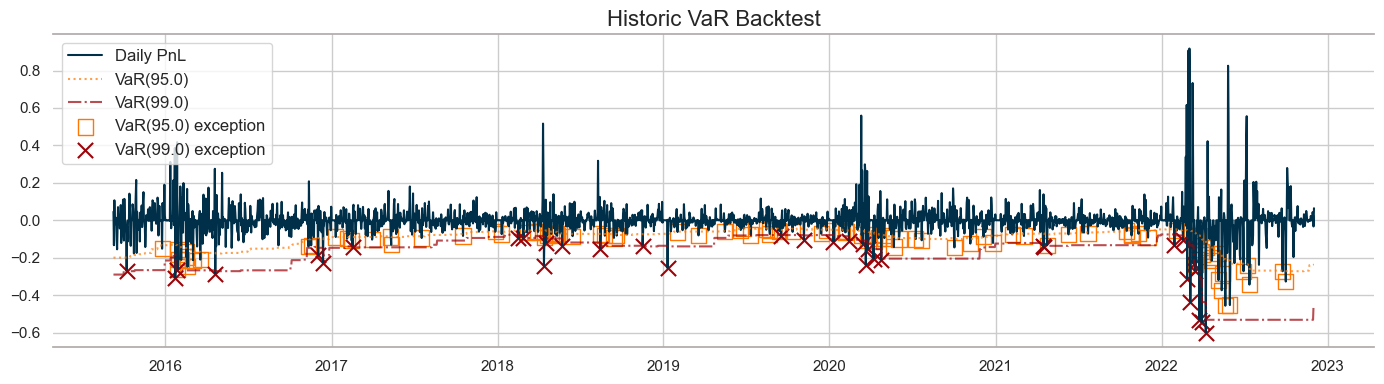

In [80]:
var.var_plot(bth)

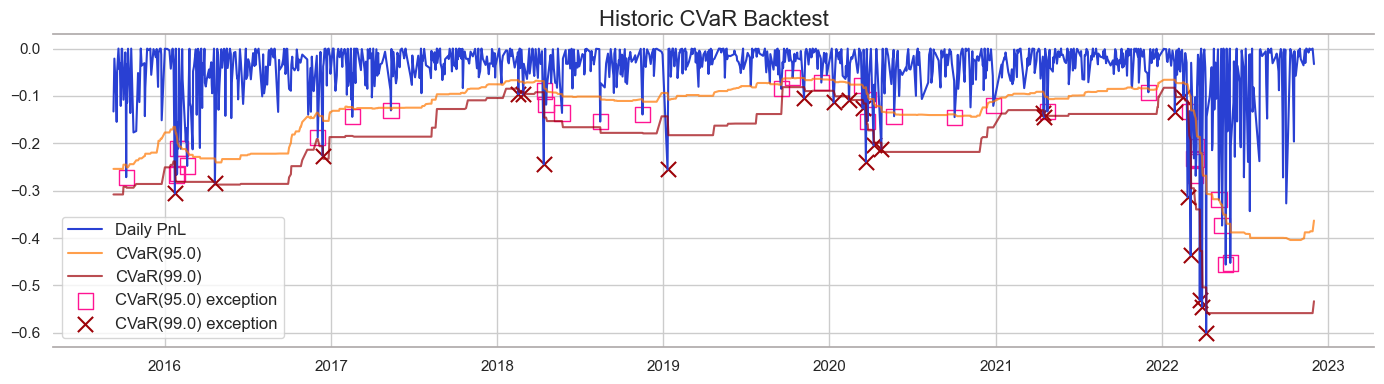

In [81]:
var.cvar_plot(bth)

In [82]:
from tabulate import tabulate

print(tabulate([['Parametric, 1d', var99param1d, cvar975param1d], ['Historical, 1d', var99hist1d, cvar975hist1d],
                ['Parametric, 10d', var99param10d, cvar975param10d], ['Historical, 10d', var99hist10d, cvar975hist10d],
                ['Bootstrapping, 1d', var99boot1d, cvar975boot1d], ['Bootstrapping, 10d', var99boot10d, cvar975boot10d]
                ],
               headers=['Approach', 'Value at Risk 99%', 'Conditional Value at Risk (ES) 97.5%'],
               tablefmt = 'fancy_grid',
               stralign = 'center',
               numalign= 'center',
               floatfmt=".4f"))

╒════════════════════╤═════════════════════╤════════════════════════════════════════╕
│      Approach      │  Value at Risk 99%  │  Conditional Value at Risk (ES) 97.5%  │
╞════════════════════╪═════════════════════╪════════════════════════════════════════╡
│   Parametric, 1d   │       -0.1924       │                -0.2576                 │
├────────────────────┼─────────────────────┼────────────────────────────────────────┤
│   Historical, 1d   │       -0.2442       │                -0.2548                 │
├────────────────────┼─────────────────────┼────────────────────────────────────────┤
│  Parametric, 10d   │       -0.6084       │                -0.8145                 │
├────────────────────┼─────────────────────┼────────────────────────────────────────┤
│  Historical, 10d   │       -0.7721       │                -0.8056                 │
├────────────────────┼─────────────────────┼────────────────────────────────────────┤
│ Bootstrapping, 1d  │       -0.2458       │          